### Final Project Submission

Please fill out:


* Student name: Group 4


* Student pace:  part time 


* Scheduled project review date/time: 1/02/26


* Instructor name: Bonface Manyara


* Blog post URL:



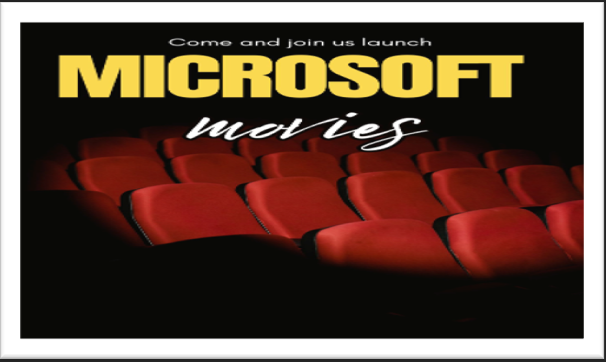

## **MICROSOFT DEBUT STUDIO ANALYSIS** 
### Overview

In this project,exploratory data analysis is applied to the movie industry dataset to provide data-driven insights for a business stakeholder.

Microsoft plans to launch a new movie studio but lacks experience in film production.This analysis helps examine movie performances,audience reception,and 

genre trends across existing films to identify patterns associated with commercial success.The results intend to help Microsoft in decision making on the 

types of movies they should prioritize producing.

#### Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, 

but they don’t know anything about creating movies.You are charged with exploring what types of films are currently doing the best at the box office. You 

must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to 

create.
   

#### Objectives

* Analyze movie industry data from mutiple sources: IMDB, The Numbers and Box Office Movies.

* Identify trends of movie performances.

* Determine key factors associated with high grossing films.

* Provide data-driven recommendations to Microsoft studios.


#### Key Business Questions

1. Which movie genres generate the highest and lowest box office revenue?

2. How does production budget relate to box office performance?

3. Do movies with higher ratings perform better financially?

4. What characteristics are common among the highest-grossing films?

5. Which factors should Microsoft prioritize when deciding what type of films to produce?

6. Which movie genres type are being produced the most?

#### Deliverables

* Cleaned and enriched datasets from four sources(Imdb.title ratings,Imdb.title.basics,movie_gross, Tn.movie_budget,).

* Data visualizations illustrating the trend of movie genres, movie ratings, gross income, budget.

* Features with strongest positive and negative correlations.

* A well-documented jupyter notebook with data cleaning, exploratory data, visualizations, and interpretations.

* A PowerPoint presentation to the stakeholder to illustrate the business value projection.



#### Final Goal

To provide Microsoft with data which will help them decide on what types of movies to produce to ensure their studio is both profitable and competitive.

# **Import Libraries**

In [227]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
%matplotlib inline

**Loading Dataframe**

In [228]:
basic_df = pd.read_csv(r'C:\Users\Sylvia\moringa_labs\ms_movie_analysis\Microsoft-Movies-Analysis\unzippedData\title.basics.csv')
rating_df = pd.read_csv(r'C:\Users\Sylvia\moringa_labs\ms_movie_analysis\Microsoft-Movies-Analysis\unzippedData\title.ratings.csv')
gross_df = pd.read_csv(r'C:\Users\Sylvia\moringa_labs\ms_movie_analysis\Microsoft-Movies-Analysis\unzippedData\bom.movie_gross.csv')
tn_budget_df = pd.read_csv(r'C:\Users\Sylvia\moringa_labs\ms_movie_analysis\Microsoft-Movies-Analysis\unzippedData\tn.movie_budgets.csv')


## **Data Understanding**
##### Basic.csv dataset

We are getting to understand our dataset by knowing the datatypes,percentages of null values and presence of duplicates 

In [229]:
basic_df.info()
basic_df.duplicated().value_counts()
basic_df.isnull().sum()* 100/len(basic_df)
print(f"The dataset has {basic_df.shape[0]} rows and {basic_df.shape[1]} columns")
basic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
The dataset has 146144 rows and 6 columns


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


##### Rating.csv dataset 

In [230]:
print(f"The dataset has {rating_df.shape[0]} rows and {rating_df.shape[1]} columns")
rating_df.info()
rating_df.isnull().sum()* 100/len(rating_df)
rating_df.duplicated().value_counts()
rating_df.head()

The dataset has 73856 rows and 3 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


##### Gross.csv dataset

In [231]:
print(f"The dataset has {gross_df.shape[0]} rows and {gross_df.shape[1]} columns")
gross_df.info()
gross_df.duplicated().value_counts()
gross_df.isnull().sum()* 100/len(gross_df)
gross_df.head()

The dataset has 3387 rows and 5 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


##### Tn.movie budget csv

In [232]:
print(f"The dataset has {tn_budget_df.shape[0]} rows and {tn_budget_df.shape[1]} columns")
tn_budget_df.info()
tn_budget_df.duplicated().value_counts()
tn_budget_df.isnull().sum()* 100/len(tn_budget_df)
tn_budget_df.head()

The dataset has 5782 rows and 6 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Making a copy of the dataset 

In [233]:
basic_df2=basic_df.copy()
rating_df2=rating_df.copy()
gross_df2=gross_df.copy()
tn_budget_df2=tn_budget_df.copy()

## **Data Preparation**

Cleaning the data for basic_df2. Drop the original_title since its repetitive and renaming the 'primary_title' to 'movie_title'.

In [234]:
basic_df2.drop(columns=['original_title'],inplace=True)
basic_df2.rename({'primary_title':'movie_title'}, axis=1, inplace=True)
basic_df2.head()

,tconst,movie_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


Replacing nan values in 'runtime_minutes' with mode for basic_df2

In [235]:
basic_df2['runtime_minutes'].mode()
basic_df2['runtime_minutes'].fillna(90, inplace=True)
basic_df2.head()

,tconst,movie_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,90.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


Spiltting 'genres' to find the dominant genre for categorical visualization. 

In [236]:
basic_df2['genres'] = basic_df['genres'].str.split(',',expand=True)
#Fill nan values with 'unknown'
basic_df2['genres'].fillna('Unknown',inplace=True)
basic_df2.head()

,tconst,movie_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,Action
1,tt0066787,One Day Before the Rainy Season,2019,114.0,Biography
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,90.0,Comedy
4,tt0100275,The Wandering Soap Opera,2017,80.0,Comedy


Changing data type from float to int for runtime_minutes 

In [237]:
basic_df2= basic_df2.astype({'runtime_minutes':'int'})
#basic_df2['runtime_minutes']= basic_df2['runtime_minutes'].astype('int32')-alternative way
#check data types
basic_df2.dtypes

tconst             object
movie_title        object
start_year          int64
runtime_minutes     int32
genres             object
dtype: object

Cleaning the dataset for gross_df2

 Changing data type of foreign gross to inter

In [238]:
gross_df2['foreign_gross']= pd.to_numeric(gross_df['foreign_gross'].str.replace(',', '', regex=True))
 #gross_df['foreign_gross'] = pd.to_numeric(gross_df['foreign_gross'].str.replace(',', '', regex=True))
gross_df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


Dropping nan values and filling 

In [239]:
gross_df2.dropna(axis=0,subset=['domestic_gross','foreign_gross'],inplace=True) 
#Fill nan in studio with 'Unknown'
gross_df2['studio'].fillna('Unknown',inplace=True)
#Check shape after dropping
gross_df2.shape


(2009, 5)

Checking Nan values %.

In [240]:
gross_df2.isnull().sum()* 100/len(gross_df)

title             0.0
studio            0.0
domestic_gross    0.0
foreign_gross     0.0
year              0.0
dtype: float64

Reset the indexing of the dataset 

In [241]:
gross_df2.reset_index(drop=True,inplace=True)
gross_df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


#### Cleaning dataset of tn.moviebudgets

Lets change the number datatypes of domestic,budget production and worldwide gross

In [242]:
tn_budget_df2['domestic_gross'] = tn_budget_df2['domestic_gross'].str.replace(r"[$,]", "", regex=True).astype(int)
tn_budget_df2['production_budget'] = tn_budget_df2['production_budget'].str.replace(r"[$,]", "", regex=True).astype(int)
tn_budget_df2["worldwide_gross"] = pd.to_numeric(tn_budget_df2["worldwide_gross"].str.replace(r"[$,]", "", regex=True))

tn_budget_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int32 
 4   domestic_gross     5782 non-null   int32 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int32(2), int64(2), object(2)
memory usage: 226.0+ KB


Separate release date to month,year for better visualization

In [243]:
tn_budget_df2['release_month'] = tn_budget_df2['release_date'].str.split(' ').str[0]
tn_budget_df2['release_year'] = tn_budget_df2['release_date'].str.split(' ').str[-1]
tn_budget_df2 = tn_budget_df2.drop(columns='release_date', axis=0)
tn_budget_df2.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,1,Avatar,425000000,760507625,2776345279,Dec,2009
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,2011
2,3,Dark Phoenix,350000000,42762350,149762350,Jun,2019
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,May,2015
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec,2017


Changing Index. Make the id the index.

In [244]:
tn_budget_df2.set_index('id', inplace=True)
tn_budget_df2.head()

,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
id,,,,,,
1,Avatar,425000000,760507625,2776345279,Dec,2009
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,2011
3,Dark Phoenix,350000000,42762350,149762350,Jun,2019
4,Avengers: Age of Ultron,330600000,459005868,1403013963,May,2015
5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec,2017


### Merge Tables

Lets join basic_df2 and rating_df2 using inner join 

In [245]:
movie_df= pd.merge(basic_df2, rating_df2, how='inner', on='tconst')
movie_df.head()

,tconst,movie_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175,Action,7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114,Biography,7.2,43
2,tt0069049,The Other Side of the Wind,2018,122,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,90,Comedy,6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80,Comedy,6.5,119


Get an overview of our new movie_df

In [246]:
movie_df.info()
movie_df.shape
movie_df.duplicated().value_counts()
movie_df.isnull().sum()*100/len(movie_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   movie_title      73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  73856 non-null  int32  
 4   genres           73856 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 4.2+ MB


tconst             0.0
movie_title        0.0
start_year         0.0
runtime_minutes    0.0
genres             0.0
averagerating      0.0
numvotes           0.0
dtype: float64

Merge movies_df to tn_budget
 to show how rating affects production budget and gross incomes.

In [247]:
rating_gross_df = pd.merge(movie_df, tn_budget_df2, how='inner', left_on='movie_title', right_on='movie')
rating_gross_df.info()
rating_gross_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2875 non-null   object 
 1   movie_title        2875 non-null   object 
 2   start_year         2875 non-null   int64  
 3   runtime_minutes    2875 non-null   int32  
 4   genres             2875 non-null   object 
 5   averagerating      2875 non-null   float64
 6   numvotes           2875 non-null   int64  
 7   movie              2875 non-null   object 
 8   production_budget  2875 non-null   int32  
 9   domestic_gross     2875 non-null   int32  
 10  worldwide_gross    2875 non-null   int64  
 11  release_month      2875 non-null   object 
 12  release_year       2875 non-null   object 
dtypes: float64(1), int32(3), int64(3), object(6)
memory usage: 280.8+ KB


,tconst,movie_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,tt0249516,Foodfight!,2012,91,Action,1.9,8248,Foodfight!,45000000,0,73706,Dec,2012
1,tt0326592,The Overnight,2010,88,Unknown,7.5,24,The Overnight,200000,1109808,1165996,Jun,2015
2,tt3844362,The Overnight,2015,79,Comedy,6.1,14828,The Overnight,200000,1109808,1165996,Jun,2015
3,tt0337692,On the Road,2012,124,Adventure,6.1,37886,On the Road,25000000,720828,9313302,Mar,2013
4,tt4339118,On the Road,2014,89,Drama,6.0,6,On the Road,25000000,720828,9313302,Mar,2013


In [248]:
#clean the df:
rating_gross_df.drop(columns=['movie_title', 'numvotes', 'release_year','release_month', 'movie', 'start_year'], inplace=True)
rating_gross_df.reset_index()
rating_gross_df.head()

,tconst,runtime_minutes,genres,averagerating,production_budget,domestic_gross,worldwide_gross
0,tt0249516,91,Action,1.9,45000000,0,73706
1,tt0326592,88,Unknown,7.5,200000,1109808,1165996
2,tt3844362,79,Comedy,6.1,200000,1109808,1165996
3,tt0337692,124,Adventure,6.1,25000000,720828,9313302
4,tt4339118,89,Drama,6.0,25000000,720828,9313302


### Overall Statistics for movie_df,gross_df2 and tn_budget_df2

In [ ]:
movie_df.describe()
# movie_df.describe(include ='all') #inclusive of categorial data

,tconst,movie_title,start_year,runtime_minutes,genres,averagerating,numvotes
count,73856,73856,73856.000000,73856.000000,73856,73856.000000,7.385600e+04
unique,73856,69993,NaN,NaN,26,NaN,NaN
top,tt1210166,The Return,NaN,NaN,Drama,NaN,NaN
freq,1,11,NaN,NaN,18572,NaN,NaN
mean,NaN,NaN,2014.276132,94.173865,NaN,6.332729,3.523662e+03
std,NaN,NaN,2.614807,197.526503,NaN,1.474978,3.029402e+04
min,NaN,NaN,2010.000000,3.000000,NaN,1.000000,5.000000e+00
25%,NaN,NaN,2012.000000,83.000000,NaN,5.500000,1.400000e+01
50%,NaN,NaN,2014.000000,90.000000,NaN,6.500000,4.900000e+01
75%,NaN,NaN,2016.000000,101.000000,NaN,7.400000,2.820000e+02


The average runtime for this dataset is 94 minutes though we have an outlier at 51420. Drama is the most common genre  while the average rating is 6.3.

In [251]:
gross_df2.describe()

,domestic_gross,foreign_gross,year
count,2.009000e+03,2.009000e+03,2009.000000
mean,4.697311e+07,7.571822e+07,2013.503235
std,8.159966e+07,1.381296e+08,2.598481
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.650000e+05,3.900000e+06,2011.000000
50%,1.650000e+07,1.930000e+07,2013.000000
75%,5.600000e+07,7.590000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


On average, movies earned about $47 million domestically and $76 million internationally. Although they vary from a few hundred dollars to over $900 million. Half of the movies gross way below the mean meaning a few of the major blockbusters highly contribute to the mean.

In [252]:
tn_budget_df2.describe()

,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


With 5,782 movies. The average production budget is about $31.6 million, while average domestic and worldwide grosses are $41.9 million and $91.5 million respectively.

 ## **Feature Engineering**

Let's get ROI to observe profit in relation to the production budget. A -negative roi means loss.

In [253]:
tn_budget_df2['roi']=(tn_budget_df2['domestic_gross']-tn_budget_df2['production_budget'])/tn_budget_df2['production_budget']*100
tn_budget_df2.head()

#calculate profit 
tn_budget_df2['profit']=tn_budget_df2['domestic_gross']-tn_budget_df2['production_budget']
tn_budget_df2.head()

,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,roi,profit
id,,,,,,,,
1,Avatar,425000000,760507625,2776345279,Dec,2009,78.942971,335507625
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,2011,-41.289850,-169536125
3,Dark Phoenix,350000000,42762350,149762350,Jun,2019,-87.782186,-307237650
4,Avengers: Age of Ultron,330600000,459005868,1403013963,May,2015,38.840250,128405868
5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec,2017,95.640815,303181382


## **Data Analysis**

##### Correlation Analysis

In [254]:
correlation_matrix = tn_budget_df2.corr()
correlation_matrix

,production_budget,domestic_gross,worldwide_gross,roi,profit
production_budget,1.000000,0.685682,0.748306,-0.048022,0.099742
domestic_gross,0.685682,1.000000,0.938853,0.034693,0.792663
worldwide_gross,0.748306,0.938853,1.000000,0.011918,0.656626
roi,-0.048022,0.034693,0.011918,1.000000,0.087646
profit,0.099742,0.792663,0.656626,0.087646,1.000000


In [255]:
# flattern correlation
sorted_pairs= correlation_matrix.stack()
sorted_pairs.head(50)

# filter and view only strong correlations
strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.5) & (sorted_pairs < 1)].drop_duplicates().sort_values(ascending=False)
strong_pairs



domestic_gross     worldwide_gross    0.938853
                   profit             0.792663
production_budget  worldwide_gross    0.748306
                   domestic_gross     0.685682
worldwide_gross    profit             0.656626
dtype: float64

##### Visualize the Correlation Matrix

<AxesSubplot:>

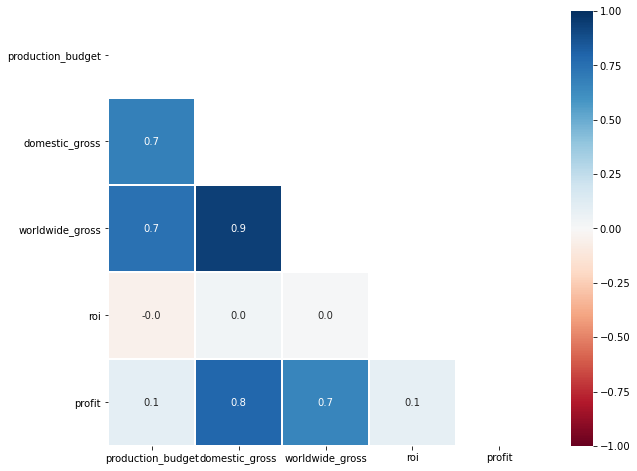

In [256]:
plt.figure(figsize=(10,8))
my_mask=np.triu(np.ones_like(correlation_matrix,dtype=bool))
sns.heatmap(correlation_matrix,annot=True,fmt=".1f",
   cmap='RdBu', vmin=-1 ,vmax=1,cbar=True,square=True,linewidths=0.3, mask=my_mask)


Observation:

From our tn_budget table, we establish that worldwide_gross has a positive relationship with domestic gross while roi does not have a relatioship; positive or strong with 

the other factors. That means if Microsft movies gross well in the domestic market, they will equally do well with the rest of the world. The local consumption does lead 

the way.


#### Correlation between profit and  total gross


In [257]:

# create total gross
tn_budget_df2['total_gross'] = tn_budget_df2['domestic_gross'] + tn_budget_df2['worldwide_gross']
tn_budget_df2.head()


,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,roi,profit,total_gross
id,,,,,,,,,
1,Avatar,425000000,760507625,2776345279,Dec,2009,78.942971,335507625,3536852904
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,2011,-41.289850,-169536125,1286727750
3,Dark Phoenix,350000000,42762350,149762350,Jun,2019,-87.782186,-307237650,192524700
4,Avengers: Age of Ultron,330600000,459005868,1403013963,May,2015,38.840250,128405868,1862019831
5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec,2017,95.640815,303181382,1936903129


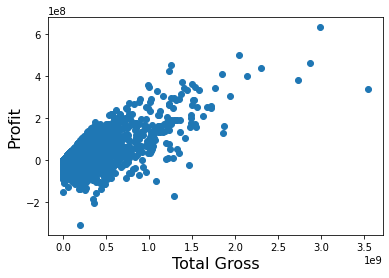

In [258]:
fig, ax=plt.subplots()

ax.scatter(tn_budget_df2['total_gross'], tn_budget_df2['profit'])

ax.set_xlabel('Total Gross', fontsize=16)
ax.set_ylabel('Profit', fontsize=16)
plt.show()

Total gross has a positive relationship with profit. Implying the higher the gross income the higher the profits as well.

#### Correlation between domestic and foreign  gross.


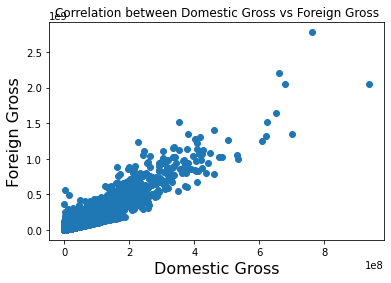

In [259]:
fig, ax= plt.subplots()

ax.scatter(tn_budget_df2['domestic_gross'],tn_budget_df2['worldwide_gross'])

ax.set_xlabel('Domestic Gross', fontsize =16)
ax.set_ylabel('Foreign Gross', fontsize = 16)
ax.set_title('Correlation between Domestic Gross vs Foreign Gross')
plt.show()

Observation:

We see these two: foreign gross vs worldwide gross and total gross vs profit does have a close positive correlation, so the numbers do translate to making profits. Hence 

grossing well does mean the production budget is recouped and a good profit margin is achieved and doing well in domestic markets does imply doing well in the rest of the 

world too.


#### Correlation between production budget and  profit


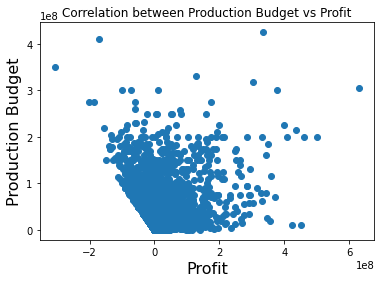

In [260]:
fig, ax= plt.subplots()

ax.scatter(tn_budget_df2['profit'],tn_budget_df2['production_budget'])

ax.set_xlabel('Profit', fontsize =16)
ax.set_ylabel('Production Budget', fontsize = 16)
ax.set_title('Correlation between Production Budget vs Profit')
plt.show()

Observation:

The production budget has a weak negative correlation with profit. Splurging on production does 

not necessarily translate to making profits. Hence we need to balance the 

cost of production with the quality of film produced i.e a better storyline over a very 

expensive set for instance.

### Visualize dataset


In [261]:
# movie_df.head()
# top10_len = movie_df.sort_values(by='averagerating', ascending=False).head(10)
# top10_len

In [262]:
genre_stats = movie_df.groupby('genres').agg(avg_rating=('averagerating', 'mean'),avg_runtime=('runtime_minutes', 'mean'))
top10_genres = genre_stats.sort_values(by='avg_rating', ascending=False).head(10)
top10_genres = top10_genres.drop('Unknown')
top10_genres


,avg_rating,avg_runtime
genres,,
Game-Show,9.000000,130.000000
Music,7.506771,99.057292
Documentary,7.316595,87.215370
Biography,7.174512,90.530149
Sport,6.944944,89.314607
Musical,6.637255,103.339869
History,6.413235,98.838235
Adventure,6.386710,90.691448
Drama,6.370563,97.440663


### Average running time of top rated genres

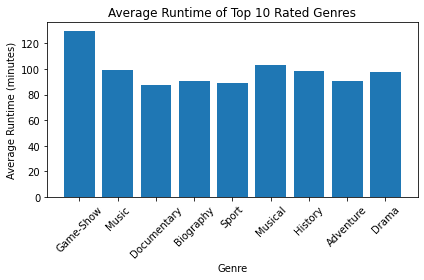

In [263]:

# top10_genres['avg_runtime'].plot(kind='bar',figsize=(10,6))
plt.bar(top10_genres.index,top10_genres['avg_runtime'])
plt.title('Average Runtime of Top 10 Rated Genres')
plt.xlabel('Genre')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Observation:

The average runtime for the top rated genres falls between 90-130 minutes. Besides game show, 

the highest rated genre, the rest show the sweetspot for average runtime is 

about 90 minutes runtime. Beyond that could be too long to keep the audience.

### Year With Highest Domestic Average Revenue from gross table

In [264]:
gross_df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [265]:
gross_df2.groupby('year')['domestic_gross'].mean().sort_values(ascending=False)


year
2018    6.222173e+07
2017    5.941676e+07
2016    5.661299e+07
2015    5.655194e+07
2013    5.279425e+07
2012    4.402413e+07
2014    4.336745e+07
2011    3.407478e+07
2010    3.285708e+07
Name: domestic_gross, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

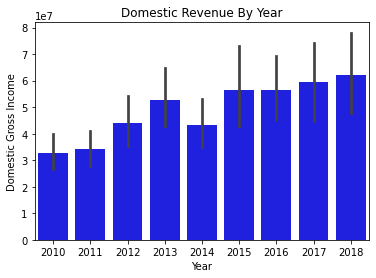

In [282]:
sns.barplot(x='year',y='domestic_gross',data=gross_df2, color="#0000FF")
plt.xlabel('Year')
plt.ylabel('Domestic Gross Income')
plt.title("Domestic Revenue By Year")
plt.show

Observations:

Except for 2014, the gross revenue has been on a steady rise over the years; implying the industry keeps growing hence investing has a good promise of growth of the 

investment. Microsoft should indeed invest in the movie industry to take part in te growth it promises.

### Genres that has movies getting produced the most vs ones that are produced the least.

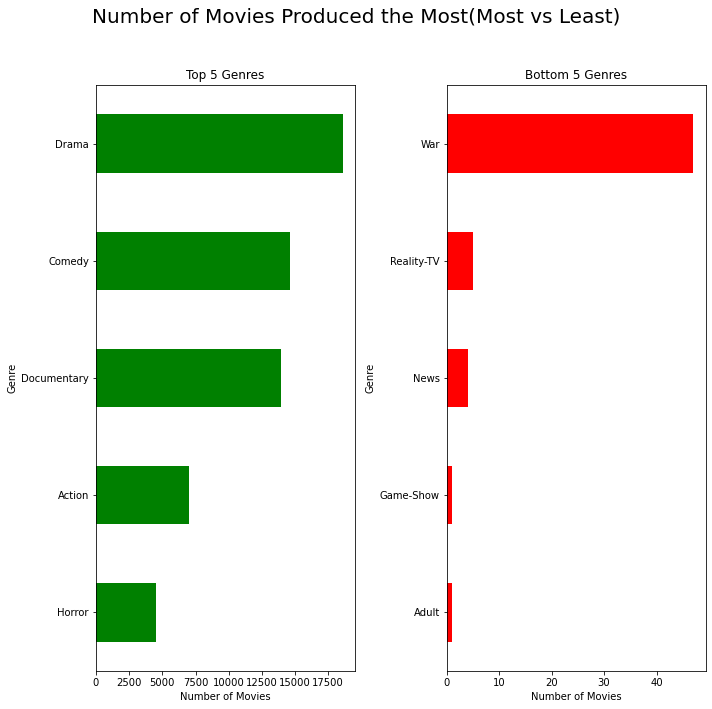

In [267]:

movie_df['genres'].unique()
genre_counts= movie_df['genres'].value_counts() #drama has most count 
top_genres = genre_counts.head(5).sort_values(ascending=True)
bottom_genres = genre_counts.tail(5).sort_values(ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(10,10))
#Most movies
top_genres.plot(kind='barh', ax=axes[0], color='green')
axes[0].set_title('Top 5 Genres')
axes[0].set_xlabel('Number of Movies')
axes[0].set_ylabel('Genre')

#Least movies
bottom_genres.plot(kind='barh', ax=axes[1], color='red')
axes[1].set_title('Bottom 5 Genres')
axes[1].set_xlabel('Number of Movies')
axes[1].set_ylabel('Genre')

# Main title
fig.suptitle('Number of Movies Produced the Most(Most vs Least)', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Observation:

In terms of the most produced movies, the drama and  comedy do take a lead, although they did 

not take a lead in the well rated categories as earlier seen. On the contrary, 

game-show that is among the least produced genre was the best rated. Microsoft is now presented 

with the decision on whether to choose what is most produced or best rated 

categories. We shall investigate if the rating influences the money for us to make a data 

driven decision.

#### Analyze and visualize based on subsets from average_rating. Create a rating categorization of 'Below Average',
#### 'Average', 'Above Average'.

In [268]:
# create total gross
rating_gross_df['total_gross'] = rating_gross_df['domestic_gross'] +rating_gross_df['worldwide_gross']


In [269]:
#categorize ratinginto 3 categories
def categorize(averagerating):
    if averagerating < 5:
        return 'Below Average'
    if averagerating < 8:
        return 'Average'
    if averagerating > 7:
        return 'Above Average'
    
rating_gross_df['Rating Category'] = rating_gross_df['averagerating'].apply(categorize)

rating_gross_df.head()


,tconst,runtime_minutes,genres,averagerating,production_budget,domestic_gross,worldwide_gross,total_gross,Rating Category
0,tt0249516,91,Action,1.9,45000000,0,73706,73706,Below Average
1,tt0326592,88,Unknown,7.5,200000,1109808,1165996,2275804,Average
2,tt3844362,79,Comedy,6.1,200000,1109808,1165996,2275804,Average
3,tt0337692,124,Adventure,6.1,25000000,720828,9313302,10034130,Average
4,tt4339118,89,Drama,6.0,25000000,720828,9313302,10034130,Average


* Create dfs for each category

In [270]:
below_avg_df = rating_gross_df[rating_gross_df['Rating Category']=='Below Average']
above_avg_df = rating_gross_df[rating_gross_df['Rating Category']=='Above Average']
avg_df = rating_gross_df[rating_gross_df['Rating Category']=='Average']
above_avg_df.head()

,tconst,runtime_minutes,genres,averagerating,production_budget,domestic_gross,worldwide_gross,total_gross,Rating Category
20,tt0435761,103,Adventure,8.3,200000000,415004880,1068879522,1483884402,Above Average
48,tt9906218,84,Documentary,8.1,95000000,81562942,165720921,247283863,Above Average
69,tt0770802,102,Documentary,8.5,4000000,2672413,5966671,8639084,Above Average
78,tt0790636,117,Biography,8.0,5000000,27298285,60611845,87910130,Above Average
101,tt0816692,169,Adventure,8.6,165000000,188017894,666379375,854397269,Above Average


* Plot hists for gross and another to see production budget

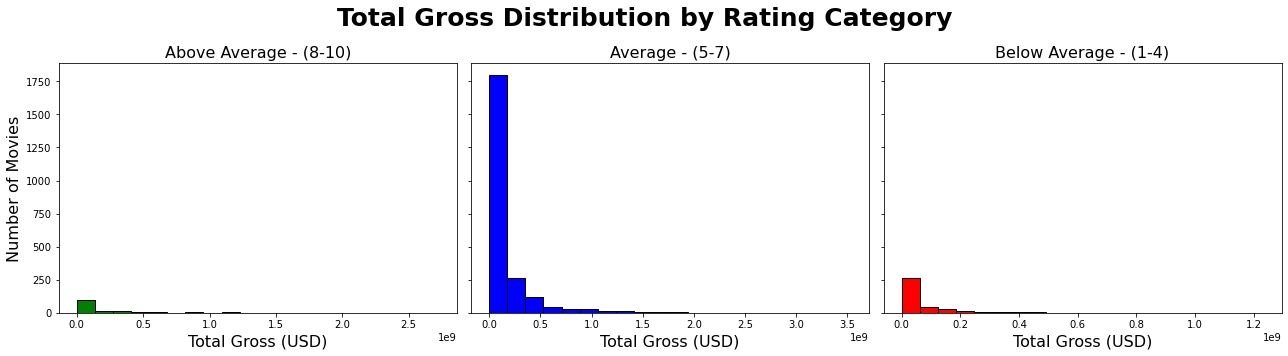

In [271]:
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=True)

# Above Average
axes[0].hist(above_avg_df['total_gross'], bins=20, color='green', edgecolor='black')
axes[0].set_title('Above Average - (8-10)', fontsize=16)
axes[0].set_xlabel('Total Gross (USD)', fontsize=16)
axes[0].set_ylabel('Number of Movies',fontsize=16)

# Average
axes[1].hist(avg_df['total_gross'], bins=20, color='blue', edgecolor='black')
axes[1].set_title('Average - (5-7)', fontsize=16)
axes[1].set_xlabel('Total Gross (USD)', fontsize=16)

# Below Average
axes[2].hist(below_avg_df['total_gross'], bins=20, color='red', edgecolor='black')
axes[2].set_title('Below Average - (1-4)', fontsize=16)
axes[2].set_xlabel('Total Gross (USD)', fontsize=16)

fig.suptitle('Total Gross Distribution by Rating Category', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

Observation:

We now see that a high rating does not really mean the movie will gross highly. In fact it is 

the averagely rated movies that gross the highest while poorly rated movies 

gross more than highly rated. Therefore in terms of bringing back the money, rating is not a 

good indicator. We therefore choose the data driven decision that the most 

produced movies as earlier seen are a better indication on what side of industry to venture 

into.

### Studio Perfomance Analysis in both foreign and domestic markets.

In [273]:
gross_df2.info()
gross_df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2009 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   float64
 4   year            2009 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 78.6+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


* Create domestic and foreign dfs. Let's have a clean df to analyze on.

In [274]:
#create domestic df:drop foreign gross
domestic_gross_df = gross_df2.drop(columns='foreign_gross')
domestic_gross_df['studio'].fillna('Unknown', inplace=True)

domestic_gross_df.dropna(inplace=True,subset=['domestic_gross'])
domestic_gross_df.reset_index(drop=True, inplace=True)
domestic_gross_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2009 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   year            2009 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 62.9+ KB


In [275]:
#create foreign df:drop domestic column and Nan values
foreign_gross_df = gross_df2.drop(columns='domestic_gross')
foreign_gross_df['studio'].fillna('Unknown', inplace=True)

foreign_gross_df.dropna(inplace=True,subset=['foreign_gross'])
foreign_gross_df.reset_index(drop=True, inplace=True)
foreign_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          2009 non-null   object 
 1   studio         2009 non-null   object 
 2   foreign_gross  2009 non-null   float64
 3   year           2009 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 62.9+ KB


* Find the studio perfomance by checking how much they gross in domestic vs foreign markets.

In [276]:
#domestic markets
studio_domestic_gross = domestic_gross_df.groupby('studio')['domestic_gross'].sum()
studio_domestic_gross = studio_domestic_gross.sort_values(ascending=False)
studio_domestic_gross.describe()


count    1.730000e+02
mean     5.454855e+08
std      2.284412e+09
min      8.000000e+02
25%      1.880000e+05
50%      2.000000e+06
75%      2.690000e+07
max      1.839653e+10
Name: domestic_gross, dtype: float64

In [277]:
# foreign markets
studio_foreign_gross = foreign_gross_df.groupby('studio')['foreign_gross'].sum()
studio_foreign_gross = studio_foreign_gross.sort_values(ascending=False)
studio_foreign_gross.describe()

count    1.730000e+02
mean     8.792942e+08
std      3.425321e+09
min      5.200000e+03
25%      1.800000e+06
50%      1.788800e+07
75%      1.215000e+08
max      2.579385e+10
Name: foreign_gross, dtype: float64

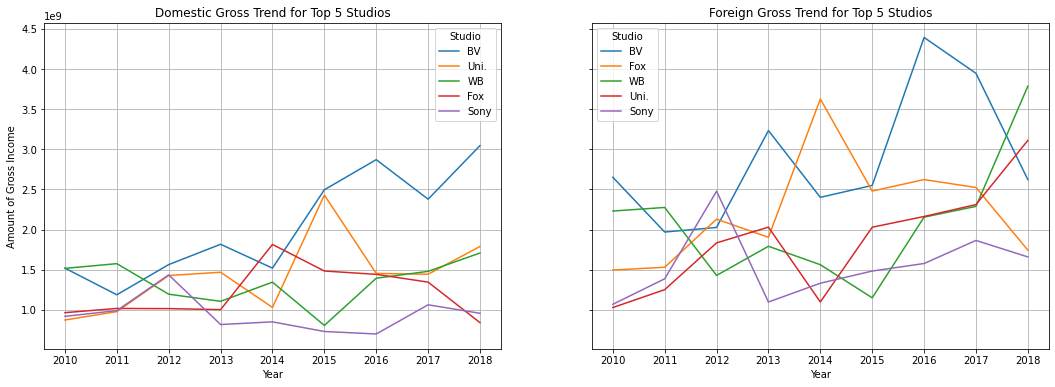

In [278]:
fig, axes = plt.subplots(1,2, figsize=(18,6), sharey=True)
#add domestic trend
domestic_studio_year = domestic_gross_df.groupby(['year', 'studio'])['domestic_gross'].sum().unstack()

domestic_top_studios = domestic_gross_df.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(5).index
domestic_studio_year[domestic_top_studios].plot(ax=axes[0])

axes[0].set_xlabel('Year')
axes[0].set_ylabel('Amount of Gross Income')
axes[0].set_title('Domestic Gross Trend for Top 5 Studios')
axes[0].legend(title='Studio')
axes[0].grid(True)

#add foreign trend

foreign_studio_year = foreign_gross_df.groupby(['year', 'studio'])['foreign_gross'].sum().unstack()

foreign_top_studios = foreign_gross_df.groupby('studio')['foreign_gross'].sum().sort_values(ascending=False).head(5).index
foreign_studio_year[foreign_top_studios].plot(ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Amount of Gross Income')
axes[1].set_title('Foreign Gross Trend for Top 5 Studios')
axes[1].legend(title='Studio')


plt.grid(True)
plt.show()


Observation:

Over the years, BV seems to have been leading the pack for the most part especially from 2015. 

Important to note is that WB has had a more downward trajectory and could be used a case study as well on wha to do/ avoid.
